<a href="https://colab.research.google.com/github/PRANEETHASRK/machinelearing/blob/main/bl_en_u4cse20001lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [5]:
dataframe = pd.read_excel('/content/lab311.xlsx',nrows=100)
dataframe.head()

,District Name,No. OfVillagesWhere SurveyCompleted,Banks,%,ATM,%.1,Connected to All weather road,%.2,Internal Pucca Roads (Cc/ Brick Road),%.3,...,Govt. Seed centre,%.20,Fertilizer Shop,%.21,Community waste disposal system,%.22,Community bio gas or recycle of waste for production use,%.23,Aanganwadi Centre,%.24
0,All India,648358,74639,11.51,47910,7.39,443734,68.44,438576,67.64,...,54474,8.40,95533,14.73,102392,15.79,38775,5.98,510774,78.78
1,State Total,7195,907,12.61,653,9.08,4824,67.05,4214,58.57,...,728,10.12,1975,27.45,218,3.03,127,1.77,6621,92.02
2,ANANTNAG (1),425,75,17.65,48,11.29,344,80.94,288,67.76,...,39,9.18,223,52.47,25,5.88,15,3.53,405,95.29
3,BADGAM (2),507,77,15.19,73,14.40,415,81.85,356,70.22,...,100,19.72,243,47.93,34,6.71,31,6.11,487,96.06
4,BARAMULLA (3),598,91,15.22,70,11.71,478,79.93,390,65.22,...,60,10.03,203,33.95,13,2.17,10,1.67,584,97.66


In [6]:
Village_Survey = []
for index,row in dataframe.iterrows():
  dataframe.loc[dataframe['No. OfVillagesWhere SurveyCompleted'] >= 50000, 'Village_Survey'] = '1'
  dataframe.loc[dataframe['No. OfVillagesWhere SurveyCompleted'] < 50000, 'Village_Survey'] = '0'


In [14]:
Feature_Vectors = []
for index,row in dataframe.iterrows():
  temp = []
  temp.append(row['No. OfVillagesWhere SurveyCompleted'])
  temp.append(row['Aanganwadi Centre'])
  temp.append(row['Community waste disposal system'])
  Feature_Vectors.append(temp)

In [7]:
dataframe.head()

,District Name,No. OfVillagesWhere SurveyCompleted,Banks,%,ATM,%.1,Connected to All weather road,%.2,Internal Pucca Roads (Cc/ Brick Road),%.3,...,%.20,Fertilizer Shop,%.21,Community waste disposal system,%.22,Community bio gas or recycle of waste for production use,%.23,Aanganwadi Centre,%.24,Village_Survey
0,All India,648358,74639,11.51,47910,7.39,443734,68.44,438576,67.64,...,8.40,95533,14.73,102392,15.79,38775,5.98,510774,78.78,1
1,State Total,7195,907,12.61,653,9.08,4824,67.05,4214,58.57,...,10.12,1975,27.45,218,3.03,127,1.77,6621,92.02,0
2,ANANTNAG (1),425,75,17.65,48,11.29,344,80.94,288,67.76,...,9.18,223,52.47,25,5.88,15,3.53,405,95.29,0
3,BADGAM (2),507,77,15.19,73,14.40,415,81.85,356,70.22,...,19.72,243,47.93,34,6.71,31,6.11,487,96.06,0
4,BARAMULLA (3),598,91,15.22,70,11.71,478,79.93,390,65.22,...,10.03,203,33.95,13,2.17,10,1.67,584,97.66,0


In [8]:
Village_Survey_Completed = []
Village_Survey_Not_Completed = []

for index,row in dataframe.iterrows():
  temp = []
  temp.append(row['No. OfVillagesWhere SurveyCompleted'])
  temp.append(row['Aanganwadi Centre'])
  temp.append(row['Community waste disposal system'])
  if row['Village_Survey'] == 1:
    Village_Survey_Completed.append(temp)
  else:
    Village_Survey_Not_Completed.append(temp)

In [9]:
np.mean(Village_Survey_Completed,axis=0)
np.mean(Village_Survey_Not_Completed,axis=0)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


array([30124.90909091, 23818.90909091,  4674.        ])

In [10]:
np.std(Village_Survey_Completed)
np.std(Village_Survey_Not_Completed)

/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:263: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims, where=where)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:223: RuntimeWarning: invalid value encountered in true_divide
  subok=False)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


100502.24940970459

In [20]:
means_distances = np.linalg.norm(np.mean(Village_Survey_Completed,axis=0) - np.mean(Village_Survey_Not_Completed,axis=0))
print(means_distances)

nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3441: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


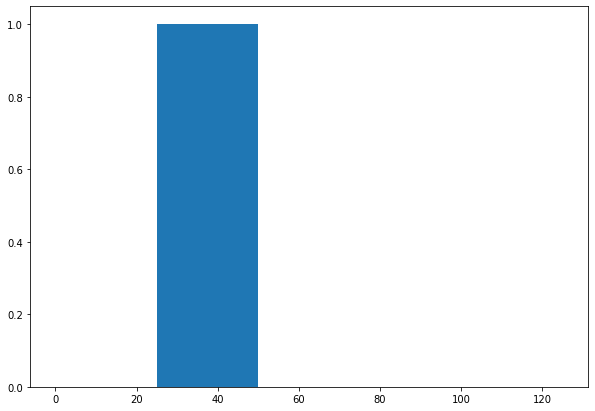

In [15]:
Feature = []
for i in range(len(Feature_Vectors)):
  Feature.append(Feature_Vectors[i][0])

Feature = np.array(Feature)
fig, histogram = plt.subplots(figsize =(10, 7))
histogram.hist(Feature, bins = [0, 25, 50, 75, 100, 125])
plt.show()

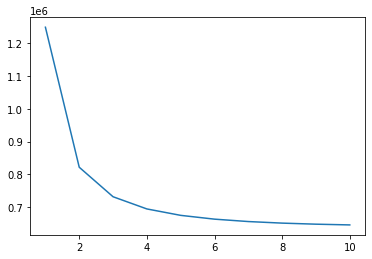

In [16]:
distances = []
x= []
for i in range(1,11):
  distances.append(distance.minkowski(Feature_Vectors[0],Feature_Vectors[1],i))
  x.append(i)

plt.plot(x,distances)
plt.show()

In [17]:
y = dataframe['Village_Survey']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(Feature_Vectors,y,test_size=0.3)

In [18]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(list(Feature_Vectors),y)
neigh.score(X_test,y_test)
neigh.predict(X_test)

array(['0', '0', '0', '0', '0', '0', '0'], dtype=object)

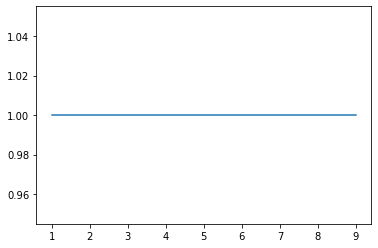

In [19]:
scores = []
x = []
for i in range(1,10):
  neigh = KNeighborsClassifier(n_neighbors=i)
  neigh.fit(list(Feature_Vectors),y)
  scores.append(neigh.score(list(X_test),y_test))
  x.append(i)


plt.plot(x,scores)
plt.show()